In [37]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import matplotlib.pyplot as plt
import glob as glob
import nltk
import collections
%matplotlib inline


In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SAHANA
[nltk_data]     SRIKANTH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1.Data EDA

In [39]:
raw_data = pd.read_csv(r'C:\Users\SAHANA SRIKANTH\Downloads\data_scientist_united_states_job_postings_jobspikr.csv')

In [40]:
raw_data.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [41]:
data = raw_data.drop(columns=['url', 'inferred_city', 'inferred_state', 'job_type', 
                              'job_board', 'geo', 'contact_email','contact_phone_number', 'html_job_description'])

In [42]:
data.head()

,crawl_timestamp,job_title,category,company_name,city,state,country,inferred_country,post_date,job_description,salary_offered,cursor,uniq_id
0,2019-02-06 05:26:22 +0000,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Usa,2019-02-06,Read what people are saying about working here...,NaN,1549432819114777,3b6c6acfcba6135a31c83bd7ea493b18
1,2019-02-06 05:33:41 +0000,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,NaN,1549432819122106,741727428839ae7ada852eebef29b0fe
2,2019-02-06 05:33:35 +0000,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,Usa,2019-02-05,Candidates should have the following backgroun...,NaN,1549432819236156,cdc9ef9a1de327ccdc19cc0d07dbbb37
3,2019-02-06 05:33:42 +0000,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,Usa,2019-02-06,Read what people are saying about working here...,NaN,1549432819259473,1c8541cd2c2c924f9391c7d3f526f64e
4,2019-02-06 05:48:23 +0000,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,NaN,1549436429015957,445652a560a5441060857853cf267470


In [43]:
data.shape

(10000, 13)

### Data Exploration

In [44]:
# drop NA rows
data_com = data[pd.notnull(data['company_name'])]

Toatl number of firms 4137
Top ten firms with most vacancies                                   company_name  job_title
1350                               CyberCoders        628
2197                           Jefferson Frank        259
2667              Nigel Frank International US         88
552                        Booz Allen Hamilton         77
3482                                   Taboola         77
331                               Apex Systems         72
2285                         Kforce Technology         71
3587                           The Judge Group         67
3305  Social Science Research Solutions (SSRS)         67
3142                    Robert Half Technology         63


Text(0, 0.5, 'Companies with most job positions')

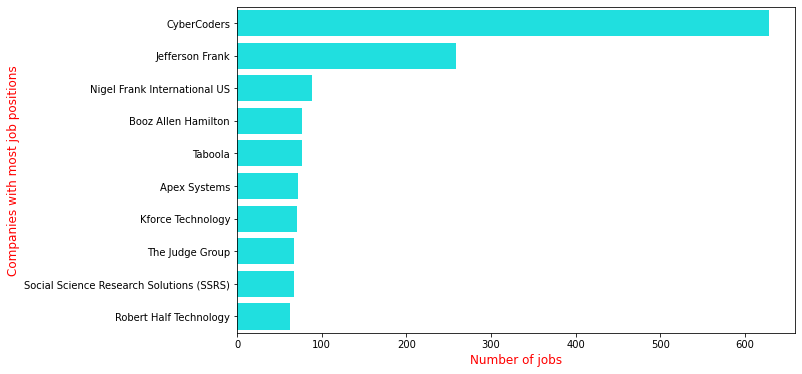

In [45]:
num_company=data_com['company_name'].nunique()
print('Toatl number of firms',num_company)

#finding highest number of vacancy in a company
company=data_com.groupby(['company_name'])['job_title'].count()
company=company.reset_index()
company=company.sort_values(['job_title'],ascending=False)
print('Top ten firms with most vacancies',company.head(10))

fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="job_title", y="company_name", data=company.head(10),color = 'cyan')    
# ax.set_xticklabels(company['company_name'])  
ax.set_xlabel('Number of jobs',fontsize=12, color='red')
ax.set_ylabel('Companies with most job positions',fontsize=12,color='red')

In [46]:
data_location = data[pd.notnull(data['state'])]

Toatl number of firms 4137
Top ten states offering the most jobs     state  job_title
23     CA       1485
487    NY        569
699    VA        511
620    TX        494
324    MA        477
270    IL        403
743    WA        344
454    NJ        310
578    PA        284
360    MD        238


Text(0, 0.5, 'states')

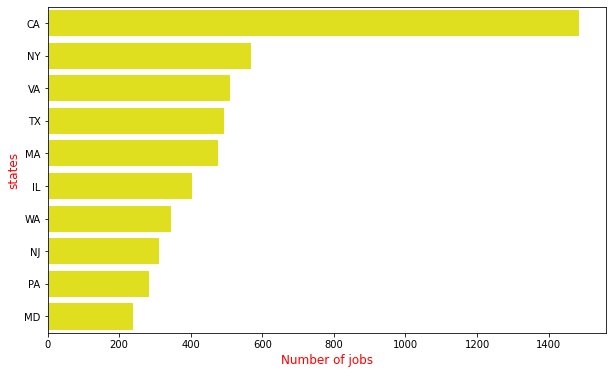

In [47]:
num_state=data_location['state'].nunique()
print('Toatl number of firms',num_company)


state=data_location.groupby(['state'])['job_title'].count()
state=state.reset_index()
state=state.sort_values(['job_title'],ascending=False)
print('Top ten states offering the most jobs',state.head(10))

fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="job_title", y="state", data=state.head(10),color = 'yellow')    
# ax.set_xticklabels(company['company_name'])  
ax.set_xlabel('Number of jobs',fontsize=12, color='red')
ax.set_ylabel('states',fontsize=12,color='red')

In [48]:
data_sal = data[pd.notnull(data['salary_offered'])]

Total number of firms 4137
Top five salaries pertaining to most jobs          salary_offered  job_title
14         $80K - $100K        405
1         $100K - $150K        109
7         $150K - $200K         36
11        $200K - $250K         15
16  $85k - 97k | Equity          5


Text(0, 0.5, 'salary offered')

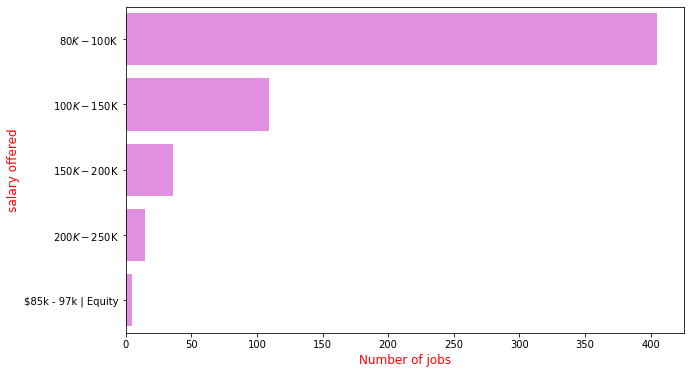

In [49]:
num_sal=data_sal['salary_offered'].nunique()
print('Total number of firms',num_company)


sal=data_sal.groupby(['salary_offered'])['job_title'].count()
sal=sal.reset_index()
sal=sal.sort_values(['job_title'],ascending=False)
print('Top five salaries pertaining to most jobs',sal.head(5))

fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="job_title", y="salary_offered", data=sal.head(5),color ='violet')    
# ax.set_xticklabels(company['company_name'])  
ax.set_xlabel('Number of jobs',fontsize=12, color='red')
ax.set_ylabel('salary offered',fontsize=12,color='red')

In [50]:
data_role = data[pd.notnull(data['job_title'])]

Toatl number of roles across all the firms 2754
Top 15 most wanted roles across firms                                  job_title  company_name
324                         Data Scientist          2888
2141                 Senior Data Scientist           644
2556                    Sr. Data Scientist           203
1734                   Lead Data Scientist           179
1937              Principal Data Scientist           148
878                      Data Scientist II           107
112               Associate Data Scientist            82
2501                     Sr Data Scientist            81
1714                 Junior Data Scientist            53
861                       Data Scientist I            49
1155  Data Scientist, (Staff or Principal)            45
271                         DATA SCIENTIST            39
2666                  Staff Data Scientist            39
896                     Data Scientist III            35
219                Clinical Data Scientist            32


Text(0, 0.5, 'Job Roles')

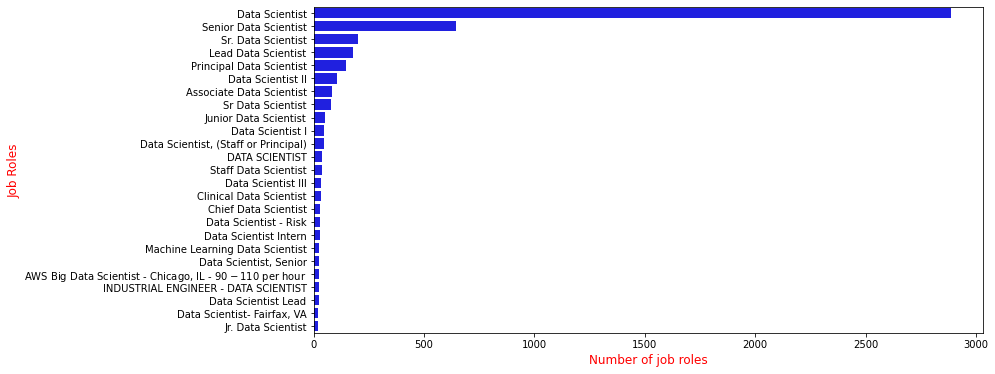

In [51]:
# Finding total number of unique roles
total_no_roles=data_role['job_title'].nunique()
print('Toatl number of roles across all the firms',total_no_roles)

# most offered roles across all the firms
roles=data_role.groupby(['job_title'])['company_name'].count()
roles=roles.reset_index()
roles=roles.sort_values(['company_name'],ascending=False)  
print('Top 15 most wanted roles across firms',roles.head(15))

fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="company_name", y="job_title", data=roles.head(25),color='blue')    
# ax.set_xticklabels(roles['job_title'],rotation=90)
ax.set_xlabel('Number of job roles',fontsize=12,color='red')
ax.set_ylabel('Job Roles',fontsize=12,color='red')

In [52]:
data_cat = data[pd.notnull(data['category'])]

Toatl number of categoris across all the firms 366
Top 15 most popular categories                                               category  company_name
32                                Computer-or-internet          1505
313                                      computer jobs           911
335                   life physical and social science           758
138                        Engineering-or-architecture           729
178                        Manufacturing-or-mechanical           632
..                                                 ...           ...
130                Director - Data Scientist, Modeling             1
129         Director - Data Scientist, Experimentation             1
128                             Digital Data Scientist             1
127                 Deep Learning Staff Data Scientist             1
183  Mgr/Sr Mgr - Model Risk Quantitative/Data Scie...             1

[366 rows x 2 columns]


Text(0, 0.5, 'Most popular industries')

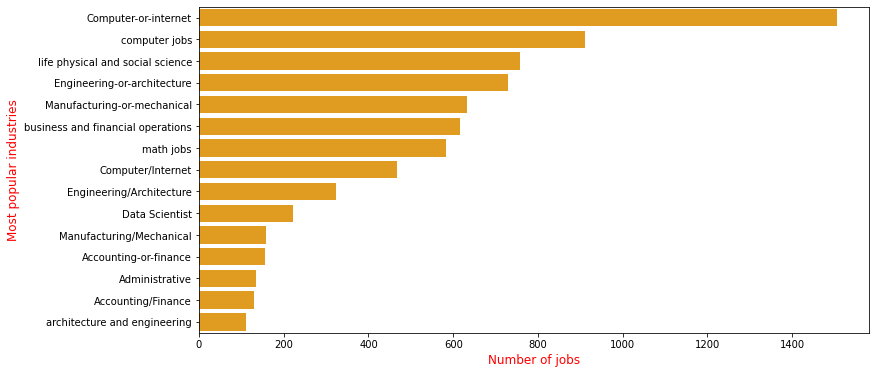

In [53]:
# Finding total number of unique categories
total_cat=data_cat['category'].nunique()
print('Toatl number of categoris across all the firms',total_cat)
# most popular industries
indus=data_cat.groupby(['category'])['company_name'].count()
indus=indus.reset_index()
indus=indus.sort_values(['company_name'],ascending=False)   
print('Top 15 most popular categories',indus)

fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="company_name", y="category", data=indus.head(15),color='orange')    
# ax.set_xticklabels(indus['category'],rotation=90)
ax.set_xlabel('Number of jobs',fontsize=12,color='red')
ax.set_ylabel('Most popular industries',fontsize=12,color='red')

### Project Cities on U.S. Map

In [69]:


import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations=["CA","NY","VA","TX","MA","IL","WA","NJ","PA","MD"],
    z=state['job_title'],
    locationmode='USA-states',
    colorscale='rdbu',
    autocolorscale=False,
    text= ['California','New York','Virginia','Texas','Massachusetts','Illinois', 'Washington','New Jersey','Pennsylvania','Maryland']    ,
    marker_line_color='white', # line markers between states
    colorbar_title="Number of Jobs"
))

fig.update_layout(
    title_text='Density of job openings in different states in USA',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()


## 2. Word Preprocessing and NLP

### Data Cleasing

In [55]:
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['equal', 'opportunity','employer','race', 'color',
                'religion', 'sexual', 'orientation', 'gender', 
                'gender','identity', 'employment', 'without',
                'regard','color','religion', 'sex', 'summary', 'location', 
                'employment', 'consideration', 'veteran','sex',
                'nation','origin','protected','applicants','receive',
                'national', 'disability', 'read','people','saying',
                'full','time','employee','status', 'posted', 'today']
stop_words.extend(newStopWords)

In [56]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
def pre_process(text):
    # lowercase
    text=text.lower()
    # remove http links
    text = re.sub(r"http\S+", "", text)
    # remove non-alphanumeric char
    text = re.sub(r"[^a-zA-Z0-9]+", ' ',text)
    return text

In [58]:
descrip = data[pd.notnull(data['job_description'])].job_description
descrip = descrip.apply(lambda x:pre_process(x))
descrip.head(10)

0    read what people are saying about working here...
1    we have an immediate opening for a sharp data ...
2    candidates should have the following backgroun...
3    read what people are saying about working here...
4    we are seeking an extraordinary data scientist...
5    read what people are saying about working here...
6    read what people are saying about working here...
7    job title sr data science consultant duration ...
8    read what people are saying about working here...
9     3 years related a professional experience pro...
Name: job_description, dtype: object

In [59]:
descrip[0]

'read what people are saying about working here we are farmers join a team of diverse professionals at farmers to acquire skills on the job and apply your learned knowledge to future roles at farmers farmers insurance also offers extensive training opportunities through the award winning university of farmers named by training magazine amongst top 10 corporate training units in the world start your career at farmers today job summary the enterprise data scientist i will be a valuable part of the data science team who provide statistical analysis modeling and vis ualization services for all lines of business and all shared service functions at farmers insurance group the data scientist 1 will work on end to end solutions as part of a team they will design innovative analytic models and will be responsible for pulling and cleaning datasets evaluating models and presenting results to internal teams essential job functions extract data from a variety of sources databases web text files and

In [60]:
all_text = [sentence for sentence in descrip]
all_text = ' '.join(all_text)

### Wordcloud

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import urllib
import requests
def wordcloud(text, max_words=200, max_font_size=50, figure_size=(10,10), 
                   title = None, title_size=20):
    mask = np.array(Image.open(requests.get('https://cdn0.iconfinder.com/data/icons/basic-shapes-outline-3/640/outline_diamond-512.png', stream=True).raw))
   

    wordcloud = WordCloud(background_color='white',
                    stopwords = stop_words,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask=mask,
                    width=800, 
                    height=400)
    wordcloud.generate(text)
    #set the plot parameters
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

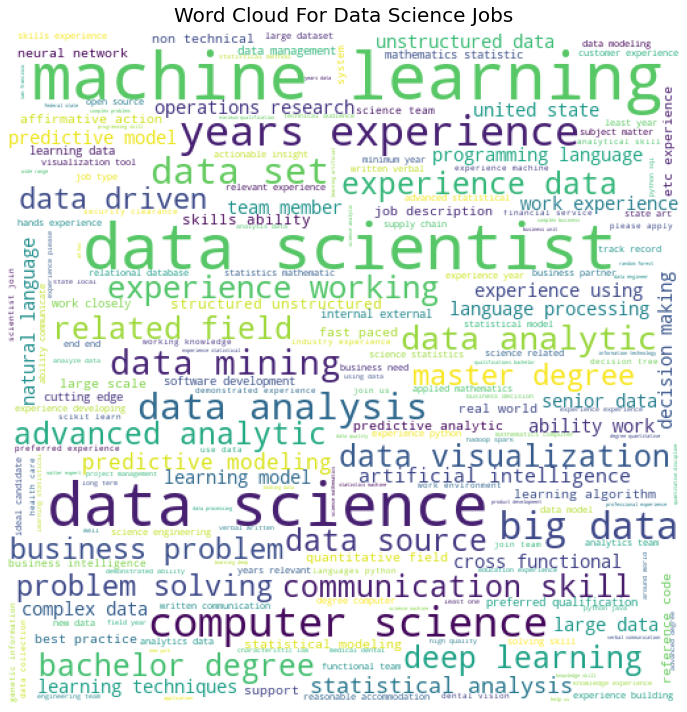

In [62]:
wordcloud(all_text, title='Word Cloud For Data Science Jobs')

### N-grams

In [63]:
def ngrams(sentence, n):
    '''
    returns ngrams of the sentence
    :param n: number of grams
    '''
    token = [token for token in sentence.split(" ") if token != "" and token not in stop_words and len(token)>1]
    ngrams = zip(*[token[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [64]:
def ngrams_generator(dataframe, n, num_keep):
    '''
    returns 
    :param num_grams_:
    '''
    dic = collections.defaultdict(int)
    for sentence in dataframe:
        for word in ngrams(sentence, n):
            dic[word] += 1
    ordered = collections.OrderedDict(sorted(dic.items(),key=lambda x: x[1], reverse=True))
    top_phrase = [i for i in ordered.keys()]
    count = [j for j in ordered.values()]
    print(top_phrase[:num_keep])
    print(count[:num_keep])
    return top_phrase[:num_keep], count[:num_keep]

In [ ]:
#barplot top phrases
# unigram
phrase, count = ngrams_generator(descrip, 1, 20)

plt.figure(figsize=(12,8))
seaborn.barplot(count, phrase,color='seagreen')
plt.xlabel("Word Count", fontsize=12, color='red')
plt.ylabel("Unigrams", fontsize=12, color='red')
plt.title("Top 20 Unigrams for Data Science Jobs")
plt.show()

In [ ]:
# bigram
phrase, count = ngrams_generator(descrip, 2, 20)

plt.figure(figsize=(12,8))
seaborn.barplot(count, phrase,color='tomato')
plt.xlabel("Word Count", fontsize=12, color='red')
plt.ylabel("Unigrams", fontsize=12, color='red')
plt.title("Top 20 Bigrams for Data Science Jobs")
plt.show()

In [ ]:
# trigram
phrase, count = ngrams_generator(descrip, 3, 20)

plt.figure(figsize=(12,8))
seaborn.barplot(count, phrase,color='brown')
plt.xlabel("Word Count", fontsize=12, color='red')
plt.ylabel("Unigrams", fontsize=12, color='red')
plt.title("Top 20 Trigrams for Data Science Jobs")
plt.show()

In [ ]:
# five gram
phrase, count = ngrams_generator(descrip, 4, 20)

plt.figure(figsize=(12,8))
seaborn.barplot(count, phrase,color='lightcoral')
plt.xlabel("Word Count", fontsize=12, color='red')
plt.ylabel("Unigrams", fontsize=12, color='red')
plt.title("Top 20 Trigrams for Data Science Jobs")
plt.show()

### TF-IDF

## 3. Machine Learning

### K-means

### Random Forest

### DBScan